In [1]:
import yfinance as yf

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
stock_data = yf.download('MSFT',start='2022-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
stock_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data['Close'],label='Close Price', color='#FF914D')

plt.title("AAPL Stock price over time")

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()

plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition_additive =  seasonal_decompose(stock_data['Close'],model='additive',period=30)
decomposition_multiplicative = seasonal_decompose(stock_data['Close'],model='multiplicative',period=30)

In [ ]:
trend_additive = decomposition_additive.trend
trend_multiplicative = decomposition_multiplicative.trend
seasonal_additive = decomposition_additive.seasonal
seasonal_multiplicative = decomposition_multiplicative.seasonal
residual_additive = decomposition_additive.resid
residual_multiplicative = decomposition_multiplicative.resid

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'],label='Original',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='Trend',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive,label='Seasonal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive,label='Residual',color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'],period=60)
result = stl.fit()

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed,label='Original',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend,label='Trend',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonal',color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid,label='Residual',color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#ADF test: Augmented Dicky-Fuller Test

In [9]:
!pip install --upgrade statsmodels

In [5]:
from statsmodels.tsa.stattools import adfuller # The adfuller function has been moved to statsmodels.tsa.stattools

In [ ]:
adf_test = adfuller(stock_data['Close'])
print("ADF Test results")
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')

for k,v in adf_test[4].items():
  print(f'   {k}: {round(value,3)}')

#KPSS Test

In [6]:
from statsmodels.tsa.stattools import kpss

In [ ]:
kpss_test = kpss(stock_data['Close'], regression='ct')

#c ---> constant (level stationarity)
#ct --> trend


print("KPSS Test Results: ")
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {round(kpss_test[1])}')
print('Critical Values:')

for k,v in kpss_test[3].items():
  print(f'   {k}: {round(v)}')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

In [8]:
np.random.seed(0)

In [9]:
n = 500

In [10]:
#strictly stationarity series: normally distributed random noise
strict_stationary_series = np.random.normal(0,1,n)

#Understanding stationarity

In [11]:
print(strict_stationary_series)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

In [12]:
#Non-strict stationarity : changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(1,1,n//2)
])

In [14]:
print(non_strict_stationary_series)

[ 3.82732430e-01 -3.42422805e-02  1.09634685e+00 -2.34215801e-01
 -3.47450652e-01 -5.81268477e-01 -1.63263453e+00 -1.56776772e+00
 -1.17915793e+00  1.30142807e+00  8.95260273e-01  1.37496407e+00
 -1.33221165e+00 -1.96862469e+00 -6.60056320e-01  1.75818953e-01
  4.98690275e-01  1.04797216e+00  2.84279671e-01  1.74266878e+00
 -2.22605681e-01 -9.13079218e-01 -1.68121822e+00 -8.88971358e-01
  2.42117961e-01 -8.88720257e-01  9.36742464e-01  1.41232771e+00
 -2.36958691e+00  8.64052300e-01 -2.23960406e+00  4.01499055e-01
  1.22487056e+00  6.48561063e-02 -1.27968917e+00 -5.85431204e-01
 -2.61645446e-01 -1.82244784e-01 -2.02896841e-01 -1.09882779e-01
  2.13480049e-01 -1.20857365e+00 -2.42019830e-01  1.51826117e+00
 -3.84645423e-01 -4.43836093e-01  1.07819730e+00 -2.55918467e+00
  1.18137860e+00 -6.31903758e-01  1.63928572e-01  9.63213559e-02
  9.42468119e-01 -2.67594746e-01 -6.78025782e-01  1.29784579e+00
 -2.36417382e+00  2.03341817e-02 -1.34792542e+00 -7.61573388e-01
  2.01125668e+00 -4.45954

In [13]:
def ks_test_stationarity(series):
  split = len(series) // 2
  series_first_half = series[:split]
  series_second_half = series[split:]
  ks_stat, p_value = ks_2samp(series_first_half,series_second_half)
  return ks_stat, p_value

In [15]:
#Perform the KS Test on strictly stationarity series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)


In [16]:
#Perform the KS Test on weak stationarity series
ks_stat_not_strict, ks_pvalue_not_strict = ks_test_stationarity(non_strict_stationary_series)

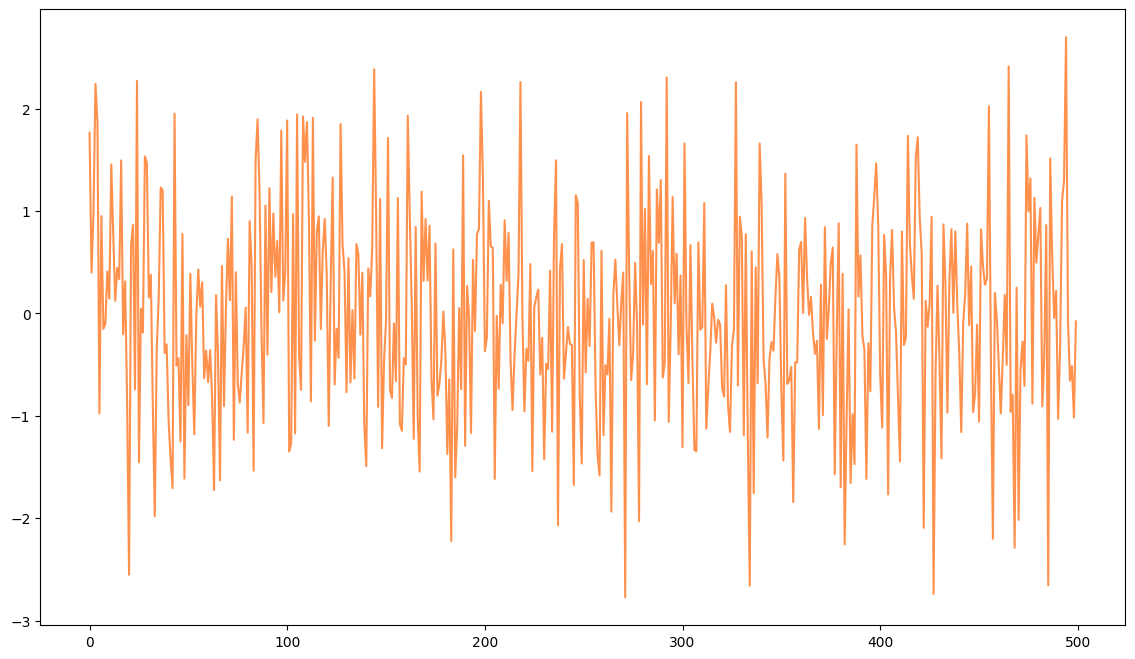

In [17]:
plt.figure(figsize=(14,8))
plt.plot(strict_stationary_series,label='Strict Stationarity',color='#FF914D')

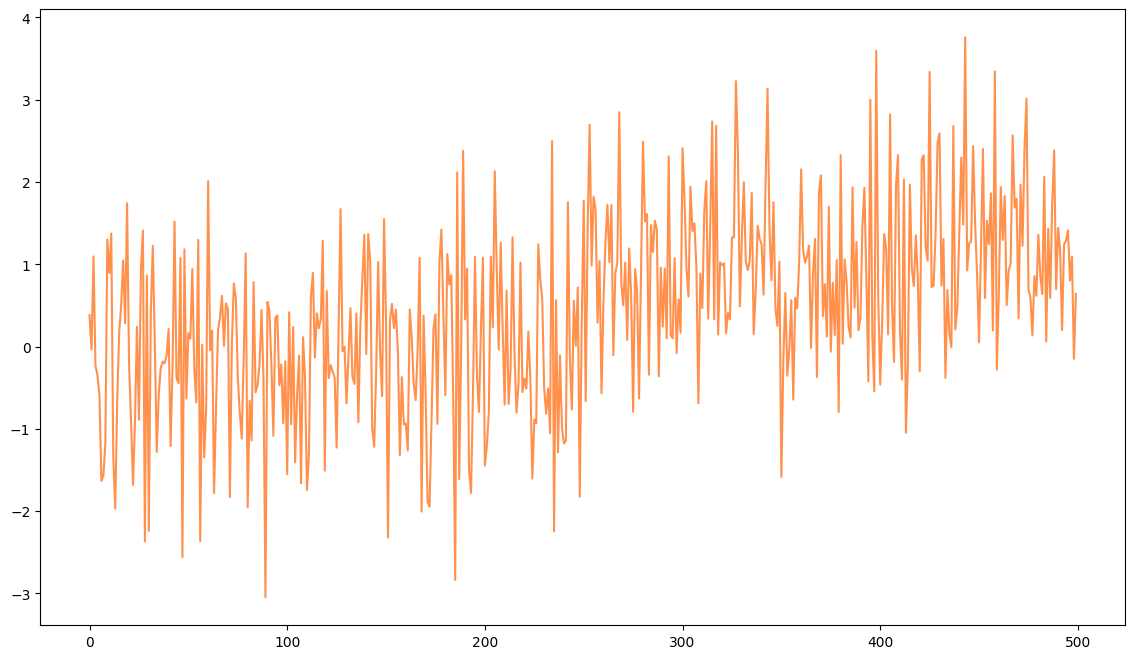

In [18]:
plt.figure(figsize=(14,8))
plt.plot(non_strict_stationary_series,label='Non-Strict Stationarity',color='#FF914D')

# Making Data Stationary

In [19]:
#  Performing ADF and KPSS tests


def adf_test(series):
  result = adfuller(series)
  print("ADF Statistic: ", result[0])
  print("p-value: ", result[1])
  print("Critical Values:")
  for key, value in result[4].items():
    print(f"   {key}: {value}")

In [20]:
def kpss_test(series):
  result = kpss(series, regression='ct')
  print("KPSS Statistic: ", result[0])
  print("p-value: ", result[1])
  for key, value in result[3].items():
    print(f"   {key}: {value}")

In [ ]:
prices = stock_data['Close']

adf_test(prices)
kpss_test(prices)

#First order differencing

In [ ]:
prices.diff()

In [ ]:
prices.diff().diff()

#Transformation

In [ ]:
import numpy as np
from scipy import stats

#Log Transformation
prices_log = np.log(prices)


#Power Transformation
prices_power = np.power(prices,2)

# Box-Cox Transformation
prices_boxCox, lam = stats.boxcox(prices[prices>0])

# De-Trending

Linear De-Trending

In [21]:
from scipy import signal

In [ ]:
trend = np.polyfit(np.arange(len(prices)),prices,1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrnded = prices - trendline

Moving Average De-Trending

In [ ]:
window = 6
prices_ma = prices.rolling(window=window).mean()
prices_detrended_ma = prices - prices_ma
prices_detrended = prices_detrended_ma.dropna()

Seasonal Adjustment

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Seasonal adjustment using moving averages

decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices/ decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()